# Práctica de Teoría de la Información
María Barroso Honrubia

Gloria del Valle Cano

#### Cambiar tema (JupyterThemes)

In [ ]:
!jt -t onedork -fs 95 -altp -tfs 13 -nfs 115 -cellw 75% -T

## Apertura de ficheros

In [5]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
from os import listdir
%matplotlib notebook
import matplotlib.pyplot as plt

FILES = "DatosSinapsisArtificial"

#with ZipFile('DatosSinapsisArtificial.zip', 'r') as zip_ref:
#    zip_ref.extractall('.')

def open_zip(f):
    print('Abriendo '+FILES+'/'+f)
    d = {}
    with ZipFile(FILES+'/'+f, 'r') as file:
        with file.open(f[:-4]+'.txt', 'r') as final:
            data = [l.decode("utf-8").rstrip().replace(",",".").split("\t") for l in final.readlines()]
            df = pd.DataFrame(data[3:],dtype=np.float64)
            d["data"] = df
            d["interval"] = float(data[0][0].split("= ")[1])
    return d

DATA = {file[:-4] : open_zip(file) for file in listdir(FILES) if file[-4:] == ".zip"}

Abriendo DatosSinapsisArtificial/TrozoG.zip
Abriendo DatosSinapsisArtificial/TrozoR.zip
Abriendo DatosSinapsisArtificial/TrozoC.zip


## Visualización y cuantización de los datos

<IPython.core.display.Javascript object>


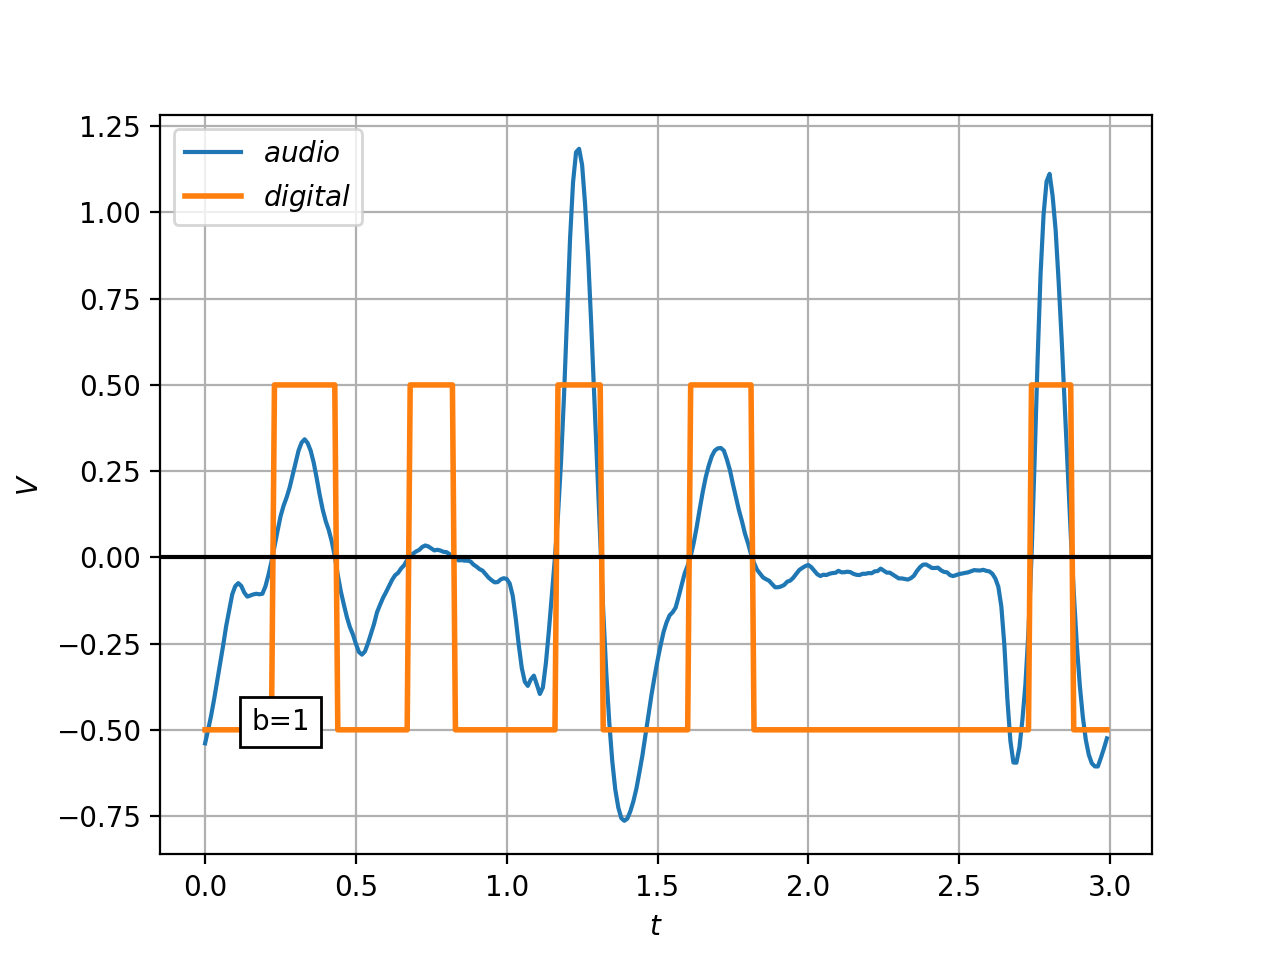

In [11]:
def levels(U, b):
    n = 2**b
    k = 2*U / n
    limits = -U + k/2 + np.arange(n)*k
    return limits

def bits_stream(digital):
    threshold = 0
    stream = digital > threshold
    stream = stream.astype(int)
    return stream

def quantize(audio, limits):
    X = audio.reshape((-1,1))
    limits = limits.reshape((1,-1))
    dists = abs(X-limits)
    index = dists.argmin(axis=1)
    quantized = limits.flat[index]
    return quantized.reshape(audio.shape)

def plot_quantization(b):
    limits = levels(U, b)
    digital = quantize(audio, limits)
    #print(digital)
    plt.plot(t, audio, label='$audio$')
    plt.plot(t, digital, lw=2, label='$digital$')
    plt.text(0.25, -0.5, 'b=%d' % b, ha='center', bbox=dict(facecolor='white'))
    plt.legend(fontsize=10); plt.xlabel('$t$'); plt.ylabel('$V$'); plt.grid(); plt.axhline(0, color='k')
    return bits_stream(digital)

Fs = 100
T = 3
#Fs = 1000
#T = len(np.array(DATA["TrozoR"]["data"]))/Fs
U = 1
t = np.arange(0, T, 1/Fs)
#audio = np.array(DATA["TrozoG"]["data"].iloc[:300,0])
audio = np.array(DATA["TrozoR"]["data"].iloc[300:600,0])
plot_quantization(1)
plt.show()
